# Лабораторная работа “ЛАЗЕРНО-ФЛУОРЕСЦЕНТНАЯ СПЕКТРОСКОПИЯ МОЛЕКУЛ”
## В  настоящем блокноте представлена  программа для  выполнения следующих задач:<br>
### 1)Усреднение спектра и определение  дрейфа длины волны лазера (если измерений больше одного)
### 2) Описание спектра

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_widths,savgol_filter
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import copy
import math
from scipy.stats import t

In [15]:
data_path =  "spectroscopy_lab_data"
save_path = "results"

In [16]:
def unpack(path, mod): 
    file = open(path + "\\" + mod + ".dat", 'r' )
    data = file.readlines()
    data = [line.rstrip().replace("\t",',').split(",") for line in data]
    settings = data[:4]
    del data[:5]
    del data[-1]
    data = np.array(data).astype('float')
    wavelength = data[:,0]
    signal = data[:, 1]
    return  settings, wavelength, signal


def find_max(data, prominence, distance):
    max_ind = find_peaks(data[1],  prominence =  prominence, distance = distance)
    return [data[0][max_ind[0]],data[1][max_ind[0]], max_ind[0]]

mod = ["spectrum"]

In [24]:
settings, wavelength, signal  =  unpack(data_path,"spectrum")

In [25]:
wavelength -= 100 

[630.872 630.899 630.926 630.953 630.98  631.008 631.035 631.062 631.089
 631.116 631.143 631.17  631.197 631.225 631.252 631.279 631.306 631.333
 631.36  631.387 631.414 631.441 631.469 631.496 631.523 631.55  631.577
 631.604 631.631 631.658 631.685 631.712 631.74  631.767 631.794 631.821
 631.848 631.875 631.902 631.929 631.956 631.983 632.011 632.038 632.065
 632.092 632.119 632.146 632.173 632.2   632.227 632.254 632.281 632.308
 632.336 632.363 632.39  632.417 632.444 632.471 632.498 632.525 632.552
 632.579 632.606 632.633 632.66  632.688 632.715 632.742 632.769 632.796
 632.823 632.85  632.877 632.904 632.931 632.958 632.985 633.012 633.039
 633.066 633.093 633.121 633.148 633.175 633.202 633.229 633.256 633.283
 633.31  633.337 633.364 633.391 633.418 633.445 633.472 633.499 633.526
 633.553 633.58  633.607 633.634 633.662 633.689 633.716 633.743 633.77
 633.797 633.824 633.851 633.878 633.905 633.932 633.959 633.986 634.013
 634.04  634.067 634.094 634.121 634.148 634.175 634

Мы убавили каждую длину волны в измерении на 100 нм, вызвано это тем, что мы на момент выполнения работы, программа отвечающая за отображение данных имела неверные настройки(какие именно настройки и почему так получилось? - неизвестно, об этом знает только преподаватель) 

Нарисуем графики 

[444. 441. 434. ... 447. 470. 486.]


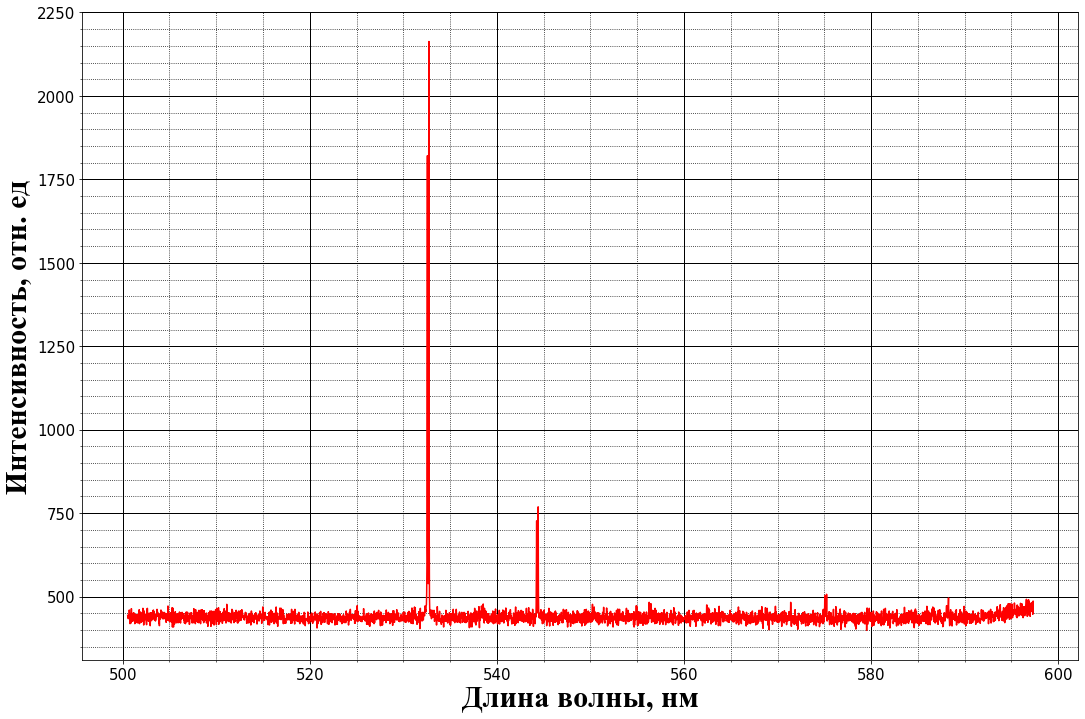

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
print(signal)
ax.plot(wavelength,  signal, c = 'r') 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "full_spectrum.jpg")

В работе использовался Nd лазер на длине волны 532 нм. На рисунке представлен спектр йода.

Проведем идентификацию спектральных линий йода(изотопа?). Рассмотрим более детально пики.

[[532.579, array([1821.])], [532.742, array([2163.])]]


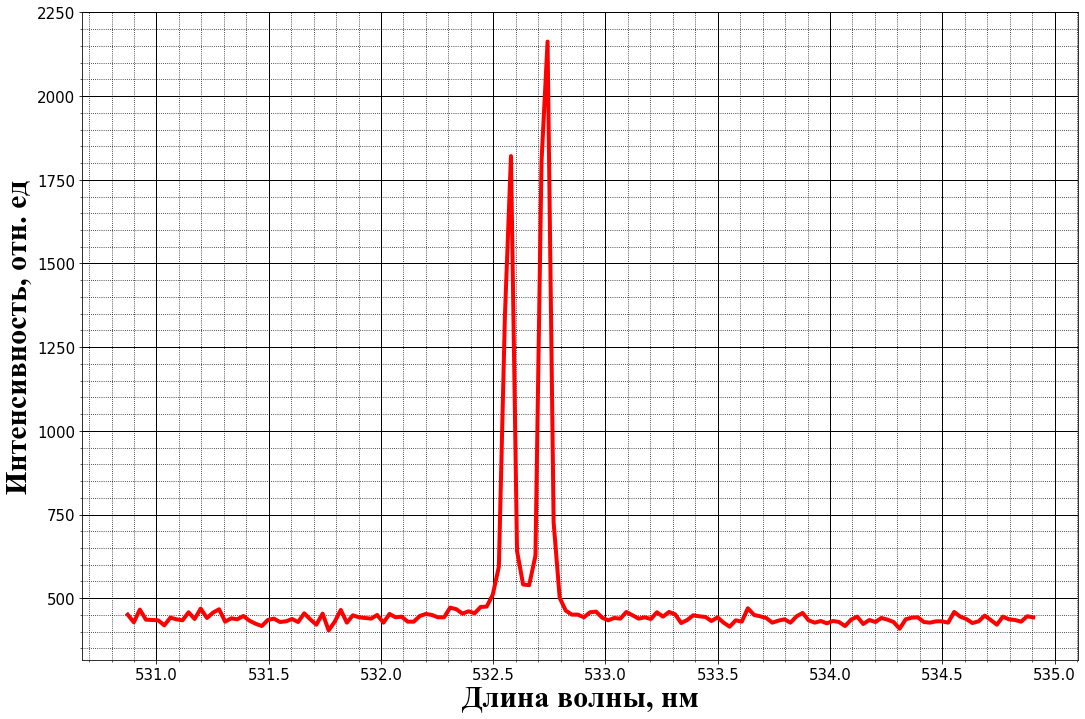

In [36]:
left = 1100
right = 1250
Max_int_index = find_peaks(signal, 1500)
print([[wavelength[i], signal[np.where(wavelength == wavelength[i])]]  for i in Max_int_index[0]])
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "first_doublet.jpg")

На рисунке разрешены переходы по отдельности. По графику можно определить, что линия, представляющая собой PR дублет, находится в интервале [532.498, 532.823] nm. Пики, отвечающие дуплету имеют следующие кооррдинаты [532.579, 1821], [532.742, 2163]. 
Взглянем на спектр поглощения йода: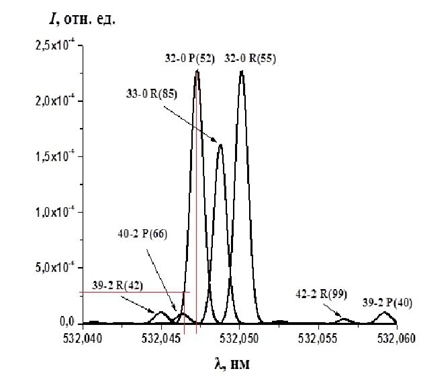
Как видим индетифицировать линию не удается, так как наша интервалы длин волн не совпадают. Оценка дрейфа длины волны лазера, из предположения ,что данная линия является резонансной, дается интервалом [0.579, 0.742] нм. В лабораторной работе использовался фотоприемник ASP-150 с разрешением 0,028 нм( по паспорту 0.06).  

[[544.253, array([727.])], [544.414, array([769.])]]


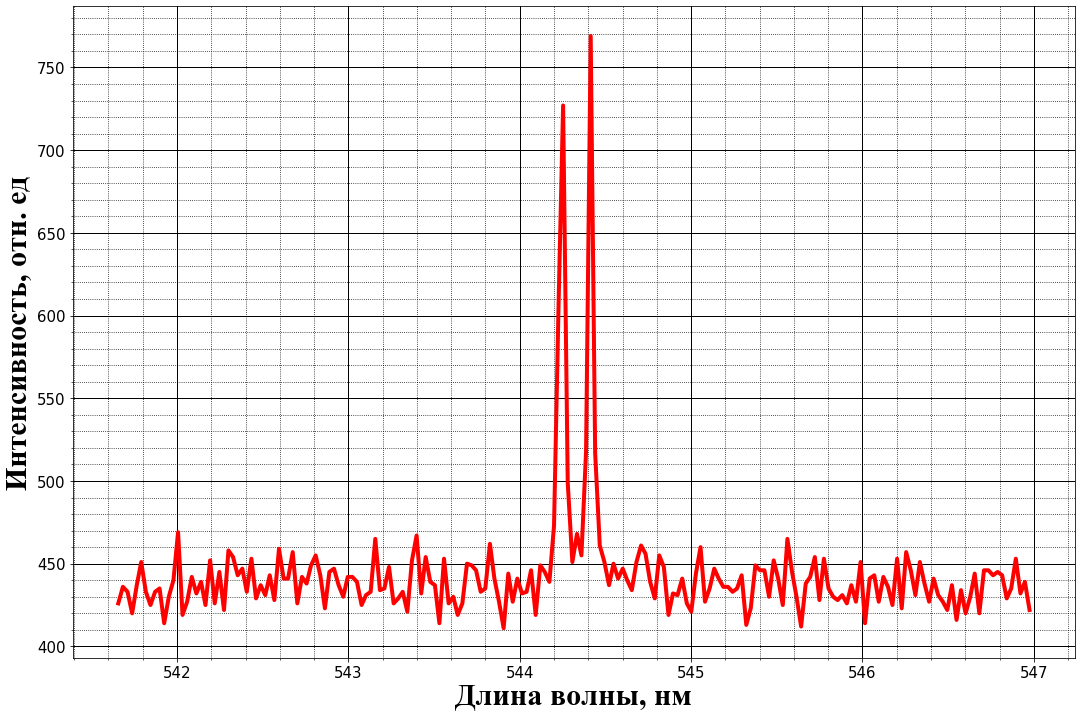

In [38]:
left = 1500
right = 1700
Max_int_index = find_peaks(signal[left:right], 500)
print([[wavelength[i+left], signal[np.where(wavelength == wavelength[i+left])]]  for i in Max_int_index[0]])
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "second_doublet.jpg")

По графику можно определить, что линия, представляющая собой PR дублет, находится в интервале [544.12, 544.521] nm. Пики, отвечающие дуплету имеют следующие кооррдинаты [544.253, 727], [544.414, 769]. 
Взглянем на спеткр поглощения йода: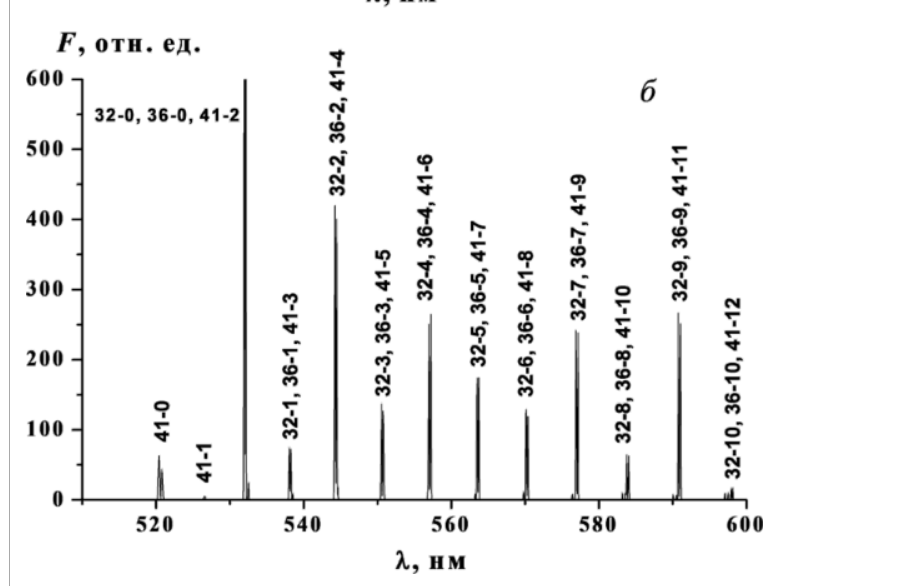
Очевидно, что данная линия относится к стоксовой флуоресценции и является одной из 32-2, 36-2, 41-4. Из-за низкого разрешения линий графика, трудно определить что именно эта за линия.

Почему возникает дрейф длины волны лазера. По-моему из температуры и из-за частого использования устройства, что меняет параметра его резонатора..

В лабораторной работе использовался фотоприемник ASP-150 с разрешением 0,028 нм, в паспорте такого разрешения нет, значит возьмем ближайшее значения из паспорта 0.06 для диапозона длин волн 190-800 нм. 